# Oaxaca

Maps for <https://mexico.werthmuller.org/besucherreisen/oaxaca>.

In [1]:
import numpy as np
import travelmaps as tm
from adashof import cm2in
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Disable DecompressionBombWarning
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

%matplotlib inline
from matplotlib import rcParams
# Adjust dpi, so figure on screen and savefig looks the same
dpi = 200
rcParams['figure.dpi'] = dpi
rcParams['savefig.dpi'] = dpi

### 1. Map

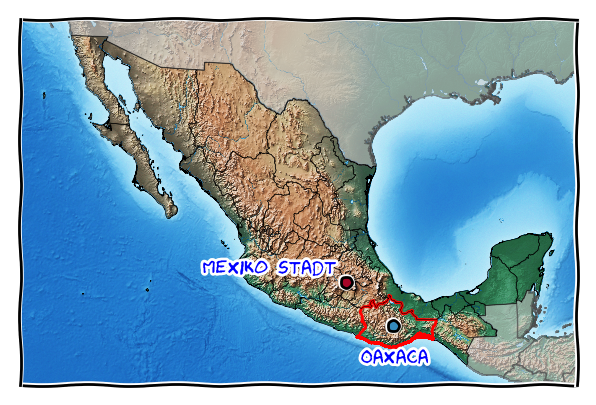

In [4]:
fig_x = plt.figure(figsize=(cm2in([11, 6])))

# Locations
MDF = [19.433333, -99.133333] # Mexico City
OAX = [16.898056, -96.414167] # Oaxaca

# Create basemap
m_x = Basemap(width=3500000, height=2300000, resolution='c',  projection='tmerc', lat_0=24, lon_0=-102)

# Plot image
m_x.warpimage('./data/TravelMap/HYP_HR_SR_OB_DR/HYP_HR_SR_OB_DR.tif')

# Put a shade over non-Mexican countries
countries = ['USA', 'BLZ', 'GTM', 'HND', 'SLV', 'NIC', 'CUB']
tm.country(countries, m_x, fc='.8', ec='.3', lw=.5, alpha=.6)

# Fill states
fcs = 32*['none']
ecs = 32*['k']
ecs[19] = 'r'
lws = 32*[.2,]
lws[19] = 1
tm.country('MEX', bmap=m_x, fc=fcs, ec=ecs, lw=lws, adm=1)

# Add visited cities
tm.city(OAX, 'Oaxaca', m_x, offs=[0, -2], halign="center")
tm.city(MDF, 'Mexiko Stadt', m_x, offs=[-.6, .6], halign="right")

# Save-path
#fpath = '../mexico.werthmuller.org/content/images/oaxaca/'
#plt.savefig(fpath+'MapOaxaca.png', bbox_inches='tight')
plt.show()

### 2. Profile

Route drawn in Google Earth, exported, and subsequently converted in <http://www.gpsvisualizer.com>.

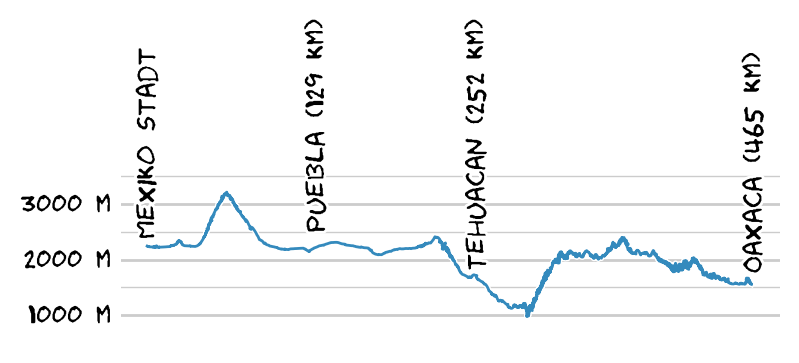

In [5]:
fig_p,ax = plt.subplots(figsize=(cm2in([10.8, 5])))

# Switch off axis and ticks
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Get data
pdat = np.loadtxt('./data/Mexico/OaxacaProfile.txt', delimiter='\t', skiprows=1)

# Plot City names and kilometers
plt.annotate('Mexiko Stadt', (0, 5500), horizontalalignment='center', rotation='vertical')
plt.annotate('Puebla (129 km)', (129, 6000), horizontalalignment='center', rotation='vertical')
plt.annotate('Tehuacan (252 km)', (252, 6000), horizontalalignment='center', rotation='vertical')
plt.annotate('Oaxaca (465 km)', (465, 5400), horizontalalignment='center', rotation='vertical')

# Ticks, hlines, axis
plt.xticks(())
plt.yticks((1000, 1500, 2000, 2500, 3000, 3500), ('1000 m', '', '2000 m', '', '3000 m', ''))
plt.hlines([1000, 2000, 3000], -100, 500, colors='.8')
plt.hlines([1500, 2500, 3500], -100, 500, colors='.8', lw=.5)
plt.axis([-20, 486, 500, 6000])

# Plat data
plt.plot(pdat[:,3], pdat[:,2])

# Save-path
#fpath = '../mexico.werthmuller.org/content/images/oaxaca/'
#plt.savefig(fpath+'Profile.png', bbox_inches='tight')

plt.show()